In [1]:
import numpy as np
from qiskit import *

## Building a circuit

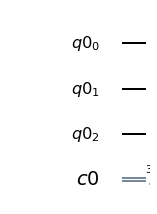

In [2]:
qr_1 = QuantumRegister(3)
cr_1 = ClassicalRegister(3)
circ_1 = QuantumCircuit(qr_1, cr_1)
circ_1.draw()

Adding some gates to the circuit

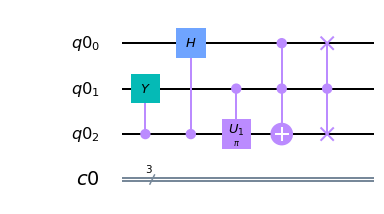

In [3]:
circ_1.cy(qr_1[2], qr_1[1])
circ_1.ch(qr_1[2], qr_1[0])
circ_1.cu1(control_qubit=qr_1[1], target_qubit=qr_1[2], theta=np.pi)
circ_1.ccx(control_qubit1=qr_1[1], control_qubit2=qr_1[0], target_qubit=qr_1[2])
circ_1.cswap(control_qubit=qr_1[1], target_qubit1=qr_1[2], target_qubit2=qr_1[0])
circ_1.draw()

## Building a circuit with the following gates
1. Y gate
2. CX gate
3. RY gate
4. Hadamard gate

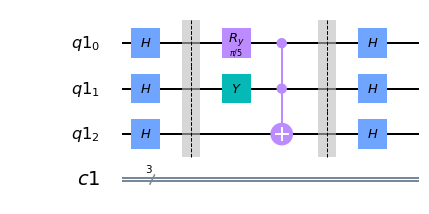

In [4]:
qr_2 = QuantumRegister(3)
cr_2 = ClassicalRegister(3)
circ_2 = QuantumCircuit(qr_2, cr_2)
circ_2.h([0,1,2])
circ_2.barrier()
circ_2.ry(np.pi/5, qr_2[0])
circ_2.y(qr_2[1])
circ_2.ccx(qr_2[0], qr_2[1], qr_2[2])
circ_2.barrier()
circ_2.h(qr_2)
circ_2.draw()

## Building a generic circuit with a parameter

In [5]:
qr_3 = QuantumRegister(5)
cr_3 = ClassicalRegister(5)
circ_3 = QuantumCircuit(qr_3, cr_3)

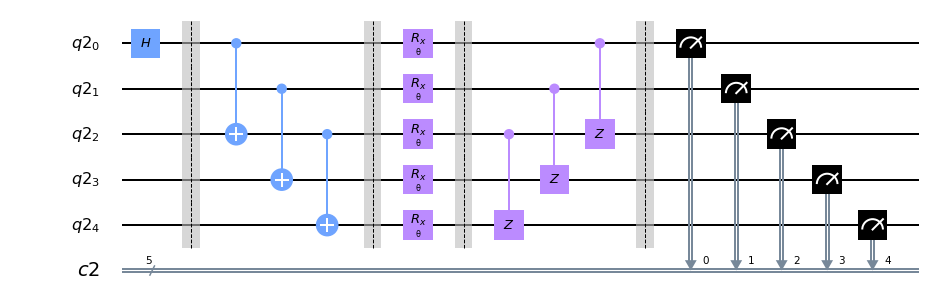

In [6]:
circ_3.h(0)

circ_3.barrier()

for iq_c, iq_x in zip(qr_3[:-2], qr_3[2:]):
    circ_3.cx(iq_c, iq_x)

circ_3.barrier()    

param = circuit.Parameter('θ')
circ_3.rx(param, qr_3)

circ_3.barrier()

for iq_c, iq_x in reversed([a for a in zip(qr_3[:-2], qr_3[2:])]):
    circ_3.cz(iq_c, iq_x)

circ_3.barrier()

circ_3.measure(qr_3, cr_3)

circ_3.draw()

## Bind the paramter and simulate

[3.141592653589793, 1.5707963267948966, 1.0471975511965976, 0.7853981633974483, 0.6283185307179586]


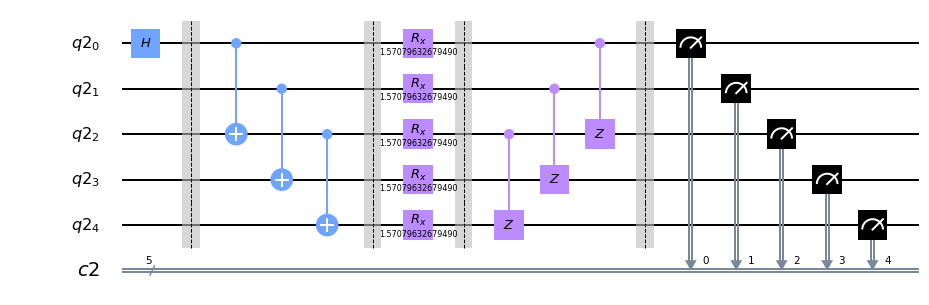

In [7]:
theta_values = [np.pi/a for a in range(1,6,1)]
theta_circuits = [circ_3.bind_parameters({param: value}) for value in theta_values]
print(theta_values)
theta_circuits[1].draw()

## Simulate each circuit

In [8]:
backend = BasicAer.get_backend("qasm_simulator")
results = [execute(circ, backend, shots=1024).result().get_counts() for circ in theta_circuits]


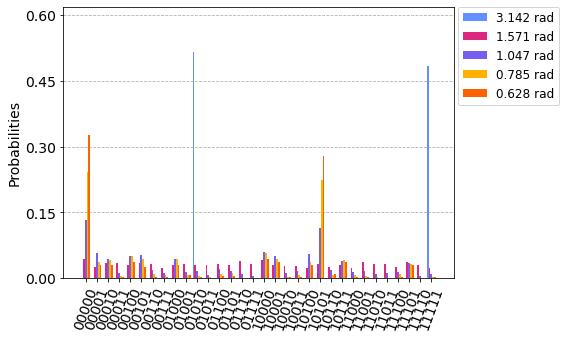

In [9]:
visualization.plot_histogram(
    results,
    legend=[str(np.around(value, 3)) + ' rad' for value in theta_values],
    bar_labels=False
)

## Sub circuits

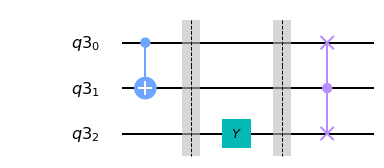

In [10]:
qr_4 = QuantumRegister(3)
circ_4 = QuantumCircuit(qr_4, name="subBlock")

circ_4.cx(0,1)
circ_4.barrier()
circ_4.y(2)
circ_4.barrier()
circ_4.cswap(control_qubit=qr_4[1], target_qubit1=qr_4[2], target_qubit2=qr_4[0])
circ_4.draw()

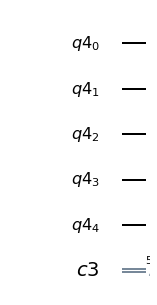

In [11]:
qr_5 = QuantumRegister(5)
cr_5 = ClassicalRegister(5)
circ_5 = QuantumCircuit(qr_5, cr_5)
circ_5.draw()

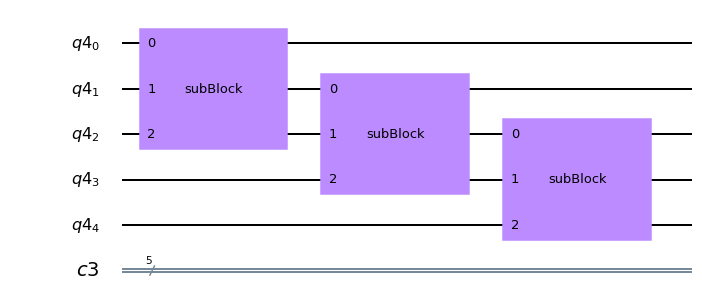

In [12]:
sub_circ_4 = circ_4.to_instruction()
circ_5.append(sub_circ_4, qr_5[0:3])
circ_5.append(sub_circ_4, qr_5[1:4])
circ_5.append(sub_circ_4, qr_5[2:5])
circ_5.draw()

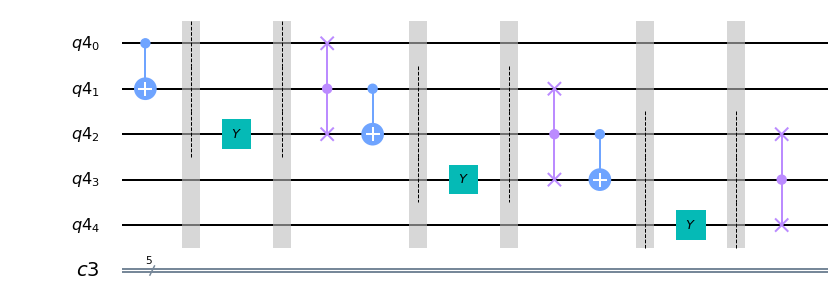

In [13]:
circ_5.decompose().draw()

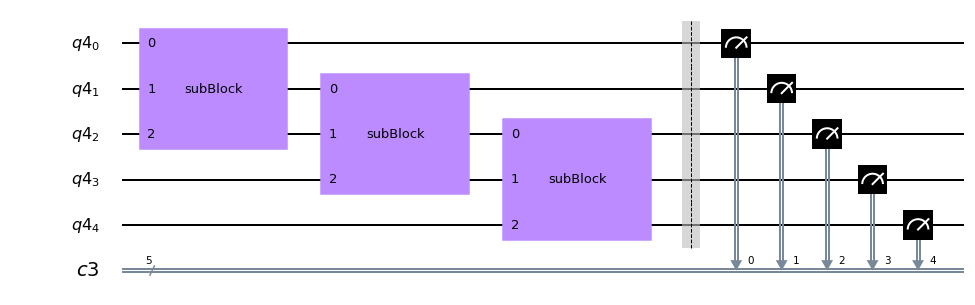

In [14]:
circ_5.barrier()
circ_5.measure(qr_5, cr_5)
circ_5.draw()

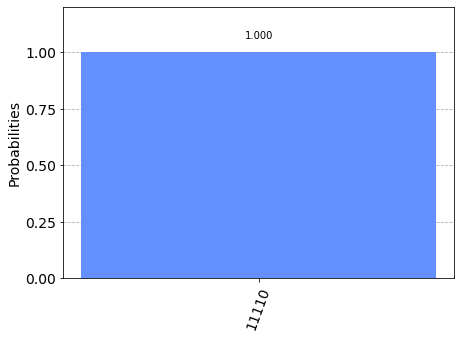

In [15]:
backend_5 = Aer.get_backend('qasm_simulator')
results_5 = execute(circ_5, backend_5, shots=1024)
visualization.plot_histogram(results_5.result().get_counts())

In [16]:
# Build your circuit here
qr_info = QuantumRegister(1,name='info')
qr_alice = QuantumRegister(1,name='alice')
qr_bob = QuantumRegister(1,name='bob')
cr_tele = ClassicalRegister(3)

circ_tele = QuantumCircuit(qr_info,qr_alice,qr_bob,cr_tele)

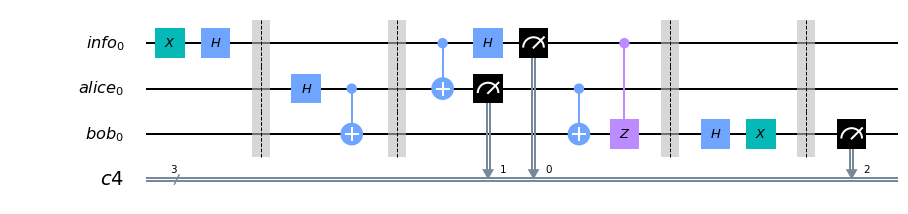

In [17]:
# Create our secret quantum state
circ_tele.x(qr_info)
circ_tele.h(qr_info)
circ_tele.barrier()

# Create the entangled pair between Alice and Bob
circ_tele.h(qr_alice)
circ_tele.cx(qr_alice,qr_bob)
circ_tele.barrier()

# Teleportation circuit
circ_tele.cx(qr_info, qr_alice)
circ_tele.h(qr_info)
circ_tele.measure(qr_info, cr_tele[0])
circ_tele.measure(qr_alice, cr_tele[1])
circ_tele.cx(qr_alice, qr_bob)
circ_tele.cz(qr_info, qr_bob)
circ_tele.barrier()

# To show that the state has been measured, we reverse the qr_info gates
circ_tele.h(qr_bob)
circ_tele.x(qr_bob)

# Then we measure. bob's qubits should only measure as |0>.
circ_tele.barrier()
circ_tele.measure(qr_bob,cr_tele[2])

# Draw
circ_tele.draw(output='mpl')

{'010': 253, '000': 254, '011': 261, '001': 256}


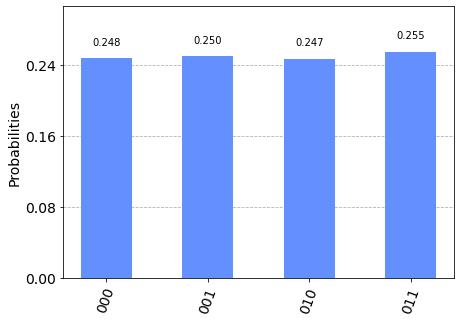

In [18]:
# Simulate on the 
qasm_simulator = Aer.get_backend('qasm_simulator')
qasm_res = execute(circ_tele,qasm_simulator, shots=1024)
print(qasm_res.result().get_counts())
visualization.plot_histogram(qasm_res.result().get_counts())